In [1]:
import cv2
import copy
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.ndimage import convolve
from vis import plot_intensity

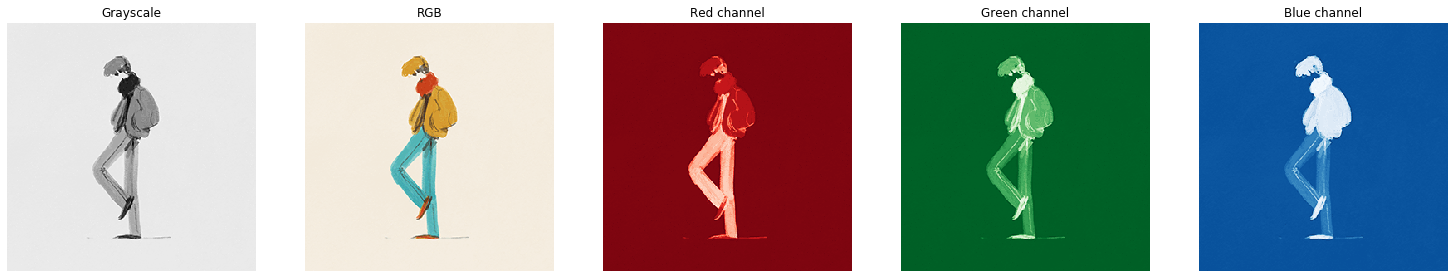

In [70]:
filename = 'longwalk.png'
im = cv2.imread(filename)
im = im[:,50:350,::-1]

fig, ax = plt.subplots(1,5,figsize=(20,4))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

im_g = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
im_r = im[...,0]
im_g = im[...,1]
im_b = im[...,2]

ax[0].imshow(im_g,cmap='gray')
ax[0].set_title('Grayscale')
ax[0].set(xticks=[], yticks=[], frame_on=False)
ax[0].axis('off')

ax[1].imshow(im)
ax[1].set_title('RGB')
ax[1].set(xticks=[], yticks=[], frame_on=False)
ax[1].axis('off')

ax[2].imshow(im_r,cmap='Reds')
ax[2].set_title('Red channel')
ax[2].set(xticks=[], yticks=[], frame_on=False)
ax[2].axis('off')

ax[3].imshow(im_g,cmap='Greens')
ax[3].set_title('Green channel')
ax[3].set(xticks=[], yticks=[], frame_on=False)
ax[3].axis('off')

ax[4].imshow(im_b,cmap='Blues')
ax[4].set_title('Blue channel')
ax[4].set(xticks=[], yticks=[], frame_on=False)
ax[4].axis('off')

plt.show()

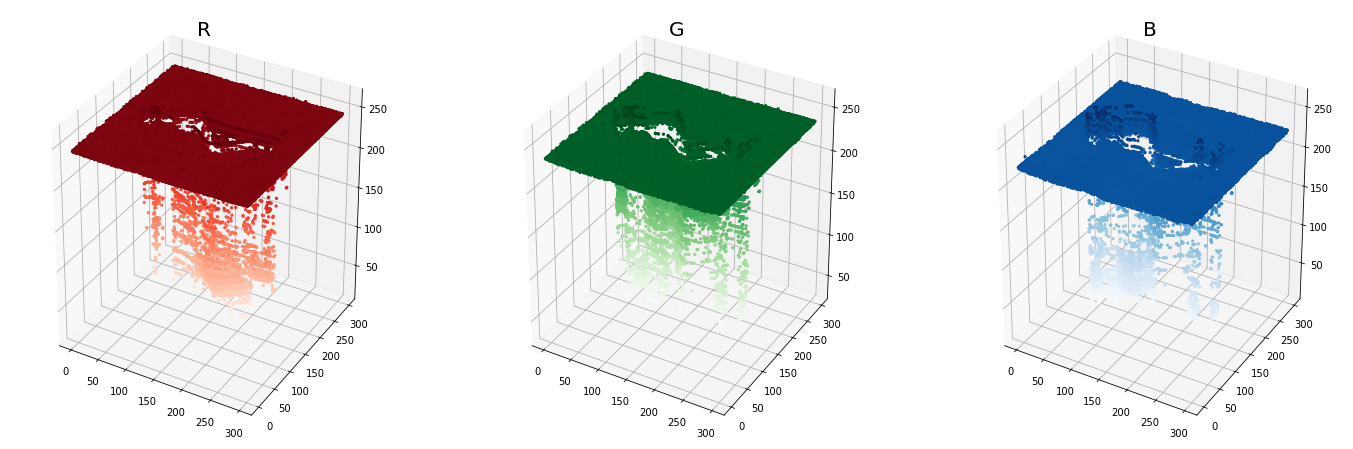

In [74]:
fig = plt.figure(figsize=(24,8))

ax1 = fig.add_subplot(131, projection='3d')
x,y,z = zip(*[(i,j,k) for i,row in enumerate(im_r) for j,k in enumerate(row)])
ax1.scatter(x,y,z,c=z,s=5, cmap='Reds', depthshade=False)
ax1.set_title('R',fontsize=20)

ax2 = fig.add_subplot(132, projection='3d')
x,y,z = zip(*[(i,j,k) for i,row in enumerate(im_g) for j,k in enumerate(row)])
ax2.scatter(x,y,z,c=z,s=5, cmap='Greens', depthshade=False)
ax2.set_title('G',fontsize=20)

ax3 = fig.add_subplot(133, projection='3d')
x,y,z = zip(*[(i,j,k) for i,row in enumerate(im_b) for j,k in enumerate(row)])
ax3.scatter(x,y,z,c=z,s=5, cmap='Blues', depthshade=False)
ax3.set_title('B',fontsize=20)

plt.show()

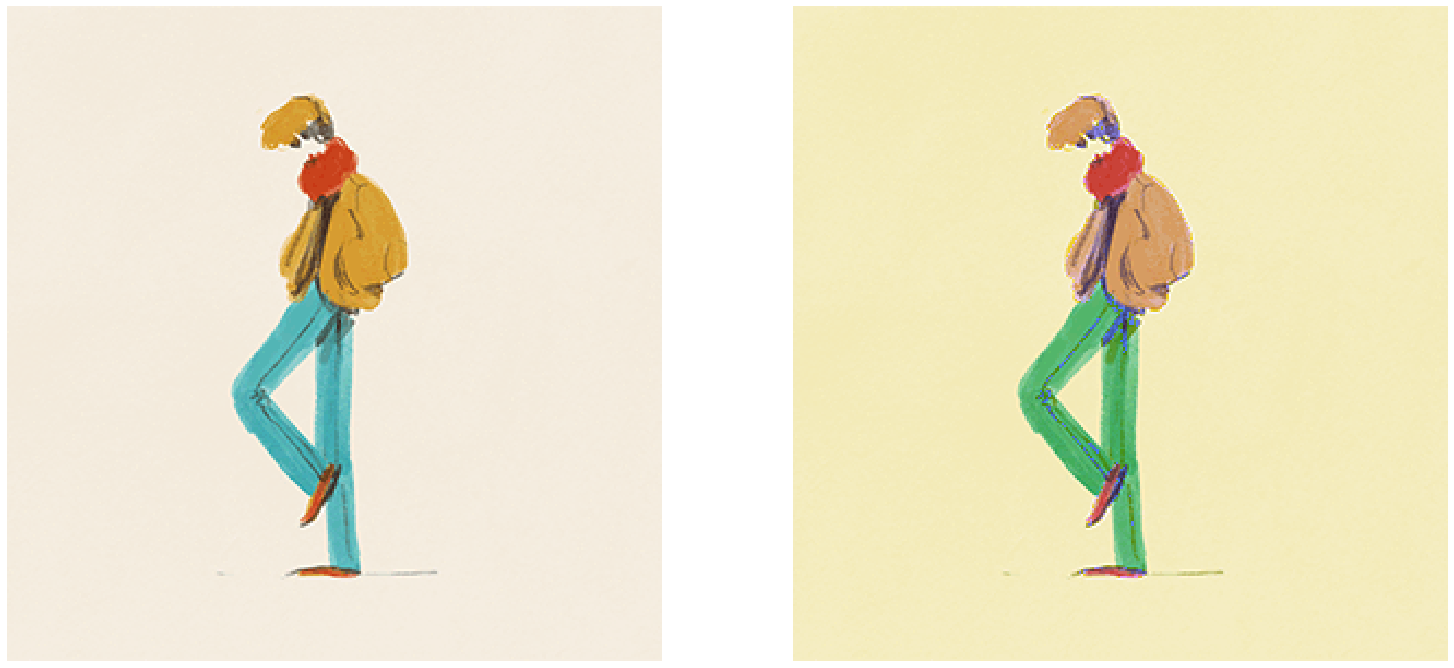

In [108]:
new_im = np.clip(np.stack((im_r*1,im_g*1,im_b*2),axis=2),0,255)

fig, ax = plt.subplots(1,2,figsize=(20,10))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

ax[0].imshow(im)
ax[0].set(xticks=[], yticks=[], frame_on=False)
ax[0].axis('off')

ax[1].imshow(new_im)
ax[1].set(xticks=[], yticks=[], frame_on=False)
ax[1].axis('off')

plt.show()

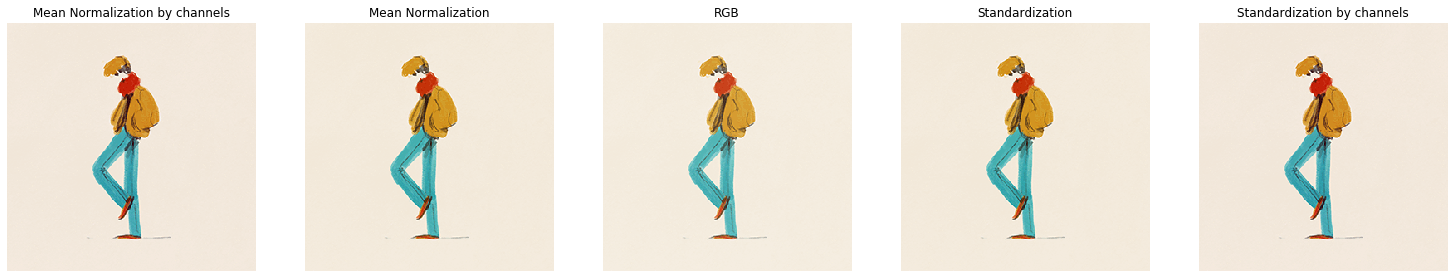

In [3]:
fig, ax = plt.subplots(1,5,figsize=(20,4))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

# Mean normalization
im_mn_channels = im - np.mean(im,axis=(0,1))
im_mn_channels_normed = (im_mn_channels-np.min(im_mn_channels,axis=(0,1)))/(np.max(im_mn_channels,axis=(0,1))-np.min(im_mn_channels,axis=(0,1)))

im_mn_whole = im - im.mean()
im_mn_whole_normed = (im_mn_whole-im_mn_whole.min())/(im_mn_whole.max()-im_mn_whole.min())

# Standardization
im_s_channels = im_mn_channels/np.std(im,axis=(0,1))
im_s_channels_normed = (im_s_channels-np.min(im_s_channels,axis=(0,1)))/(np.max(im_s_channels,axis=(0,1))-np.min(im_s_channels,axis=(0,1)))

im_s_whole = im_mn_whole/im.std()
im_s_whole_normed = (im_s_whole-im_s_whole.min())/(im_s_whole.max()-im_s_whole.min())

ax[0].imshow(im_mn_channels_normed)
ax[0].set_title('Mean Normalization by channels')
ax[0].set(xticks=[], yticks=[], frame_on=False)
ax[0].axis('off')

ax[1].imshow(im_mn_whole_normed)
ax[1].set_title('Mean Normalization')
ax[1].set(xticks=[], yticks=[], frame_on=False)
ax[1].axis('off')

ax[2].imshow(im)
ax[2].set_title('RGB')
ax[2].set(xticks=[], yticks=[], frame_on=False)
ax[2].axis('off')

ax[3].imshow(im_s_whole_normed)
ax[3].set_title('Standardization')
ax[3].set(xticks=[], yticks=[], frame_on=False)
ax[3].axis('off')

ax[4].imshow(im_s_channels_normed)
ax[4].set_title('Standardization by channels')
ax[4].set(xticks=[], yticks=[], frame_on=False)
ax[4].axis('off')

plt.show()

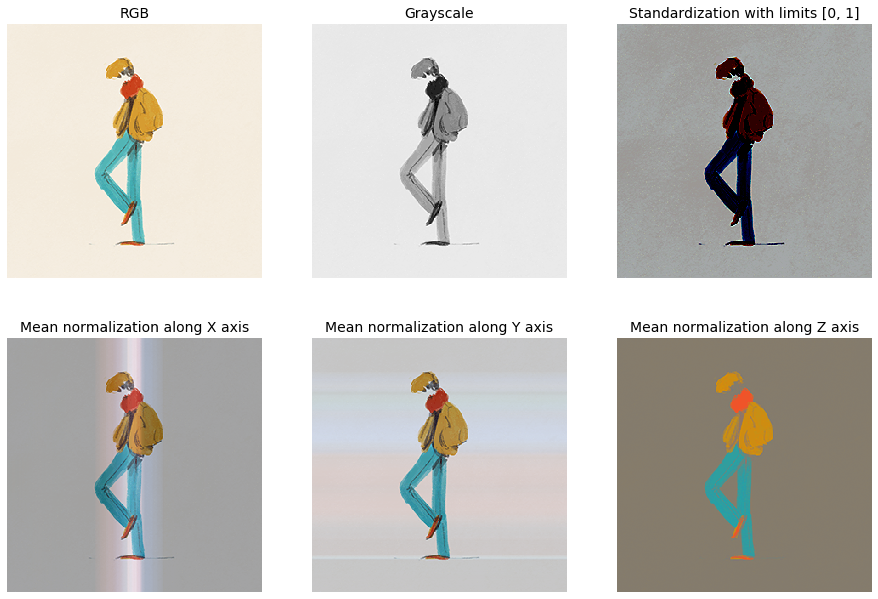

In [4]:
fig, ax = plt.subplots(2,3,figsize=(12,8))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

# Mean normalization
im_mn_ax0 = im - im.mean(axis=0,keepdims=True)
im_mn_ax0 = (im_mn_ax0-im_mn_ax0.min())/(im_mn_ax0.max()-im_mn_ax0.min())

im_mn_ax1 = im - im.mean(axis=1,keepdims=True)
im_mn_ax1 = (im_mn_ax1-im_mn_ax1.min())/(im_mn_ax1.max()-im_mn_ax1.min())

im_mn_ax2 = im - im.mean(axis=2,keepdims=True)
im_mn_ax2 = (im_mn_ax2-im_mn_ax2.min())/(im_mn_ax2.max()-im_mn_ax2.min())

# Standardization
im_s = (im-np.mean(im,axis=(0,1)))/np.std(im,axis=(0,1))
im_s = np.clip(im_s, -1, 1)
im_s = (im_s+1)/2

ax[0,0].imshow(im)
ax[0,0].set_title('RGB',fontsize=14)
ax[0,0].set(xticks=[], yticks=[], frame_on=False)
ax[0,0].axis('off')

ax[0,1].imshow(im_g,cmap='gray')
ax[0,1].set_title('Grayscale',fontsize=14)
ax[0,1].set(xticks=[], yticks=[], frame_on=False)
ax[0,1].axis('off')

ax[0,2].imshow(im_s)
ax[0,2].set_title('Standardization with limits [0, 1]',fontsize=14)
ax[0,2].set(xticks=[], yticks=[], frame_on=False)
ax[0,2].axis('off')

ax[1,0].imshow(im_mn_ax0)
ax[1,0].set_title('Mean normalization along X axis',fontsize=14)
ax[1,0].set(xticks=[], yticks=[], frame_on=False)
ax[1,0].axis('off')

ax[1,1].imshow(im_mn_ax1)
ax[1,1].set_title('Mean normalization along Y axis',fontsize=14)
ax[1,1].set(xticks=[], yticks=[], frame_on=False)
ax[1,1].axis('off')

ax[1,2].imshow(im_mn_ax2)
ax[1,2].set_title('Mean normalization along Z axis',fontsize=14)
ax[1,2].set(xticks=[], yticks=[], frame_on=False)
ax[1,2].axis('off')

plt.show()

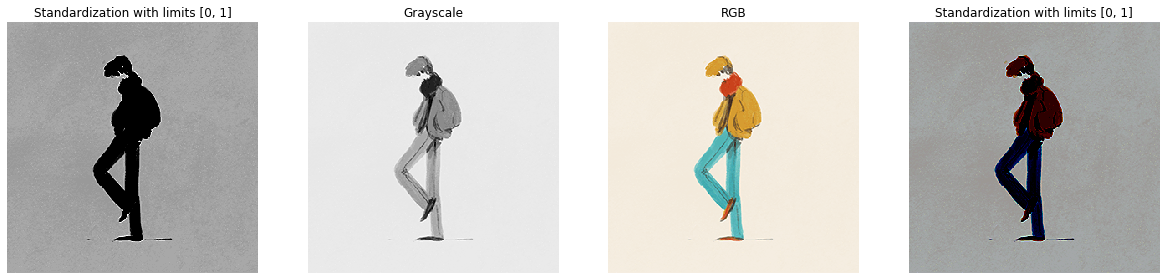

In [5]:
fig, ax = plt.subplots(1,4,figsize=(16,4))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

# Standardization
im_g_s = (im_g-im_g.mean())/im_g.std()
im_g_s = np.clip(im_g_s, -1, 1)
im_g_s = (im_g_s+1)/2

ax[0].imshow(im_g_s,cmap='gray')
ax[0].set_title('Standardization with limits [0, 1]')
ax[0].set(xticks=[], yticks=[], frame_on=False)
ax[0].axis('off')

ax[1].imshow(im_g,cmap='gray')
ax[1].set_title('Grayscale')
ax[1].set(xticks=[], yticks=[], frame_on=False)
ax[1].axis('off')

ax[2].imshow(im)
ax[2].set_title('RGB')
ax[2].set(xticks=[], yticks=[], frame_on=False)
ax[2].axis('off')

ax[3].imshow(im_s)
ax[3].set_title('Standardization with limits [0, 1]')
ax[3].set(xticks=[], yticks=[], frame_on=False)
ax[3].axis('off')

plt.show()

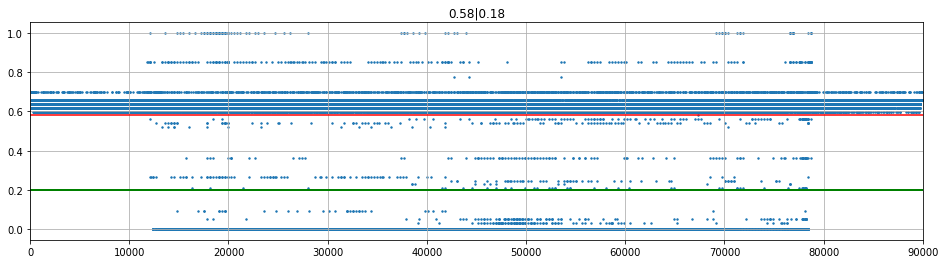

In [6]:
Y = im_g_s.flatten()
X = range(len(Y))

xl = np.array([0,len(Y)])
yl = np.array([im_g_s.mean()]*2)

xref = np.array([0,len(Y)])
yref = np.array([0.2]*2)

plt.figure(figsize=(16,4))
plt.scatter(X,Y,s=2)
plt.plot(xl,yl,color='red')
plt.plot(xref,yref,color='green',linewidth=2)
plt.title('%.2f|%.2f'%(im_g_s.mean(),im_g_s.std()))
plt.xlim(0,len(Y))
plt.grid(True)
plt.show()

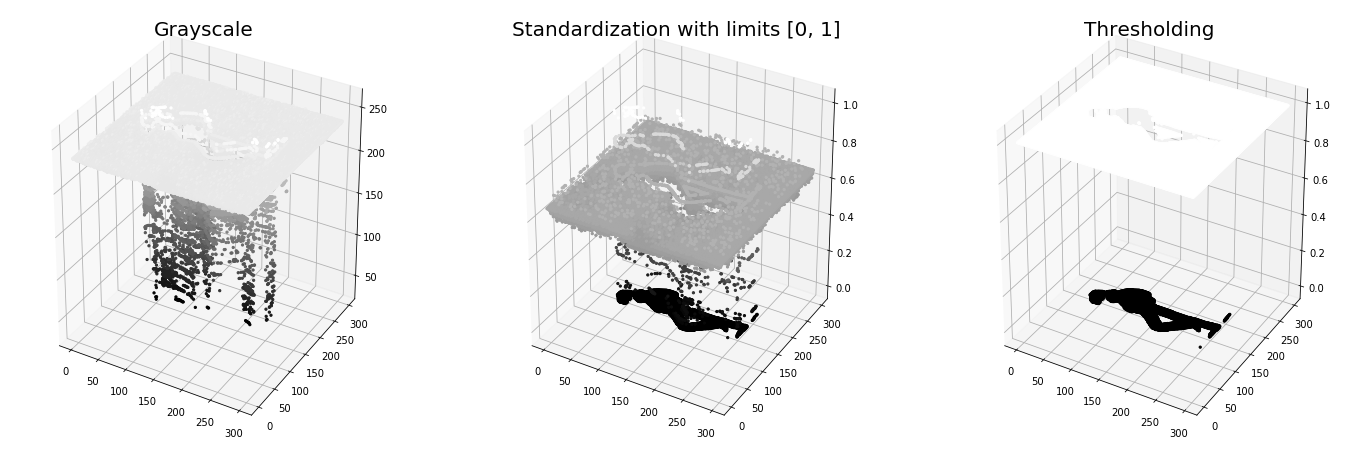

In [7]:
fig = plt.figure(figsize=(24,8))

# Thresholding
th = 0.2
im_bw = copy.deepcopy(im_g_s)
im_bw[im_bw>=th] = 1
im_bw[im_bw<th] = 0

ax1 = fig.add_subplot(131, projection='3d')
x,y,z = zip(*[(i,j,k) for i,row in enumerate(im_g) for j,k in enumerate(row)])
ax1.scatter(x,y,z,c=z,s=5, cmap='gray', depthshade=False)
ax1.set_title('Grayscale',fontsize=20)

ax2 = fig.add_subplot(132, projection='3d')
x,y,z = zip(*[(i,j,k) for i,row in enumerate(im_g_s) for j,k in enumerate(row)])
ax2.scatter(x,y,z,c=z,s=5, cmap='gray', depthshade=False)
ax2.set_title('Standardization with limits [0, 1]',fontsize=20)

ax3 = fig.add_subplot(133, projection='3d')
x,y,z = zip(*[(i,j,k) for i,row in enumerate(im_bw) for j,k in enumerate(row)])
ax3.scatter(x,y,z,c=z,s=5, cmap='gray', depthshade=False)
ax3.set_title('Thresholding',fontsize=20)

plt.show()

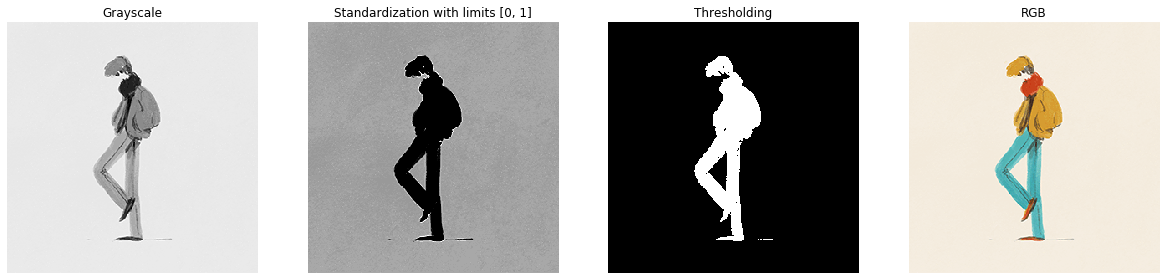

In [8]:
fig, ax = plt.subplots(1,4,figsize=(16,4))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

ax[0].imshow(im_g,cmap='gray')
ax[0].set_title('Grayscale')
ax[0].set(xticks=[], yticks=[], frame_on=False)
ax[0].axis('off')

ax[1].imshow(im_g_s,cmap='gray')
ax[1].set_title('Standardization with limits [0, 1]')
ax[1].set(xticks=[], yticks=[], frame_on=False)
ax[1].axis('off')

ax[2].imshow(im_bw,cmap='binary')
ax[2].set_title('Thresholding')
ax[2].set(xticks=[], yticks=[], frame_on=False)
ax[2].axis('off')

ax[3].imshow(im)
ax[3].set_title('RGB')
ax[3].set(xticks=[], yticks=[], frame_on=False)
ax[3].axis('off')

plt.show()

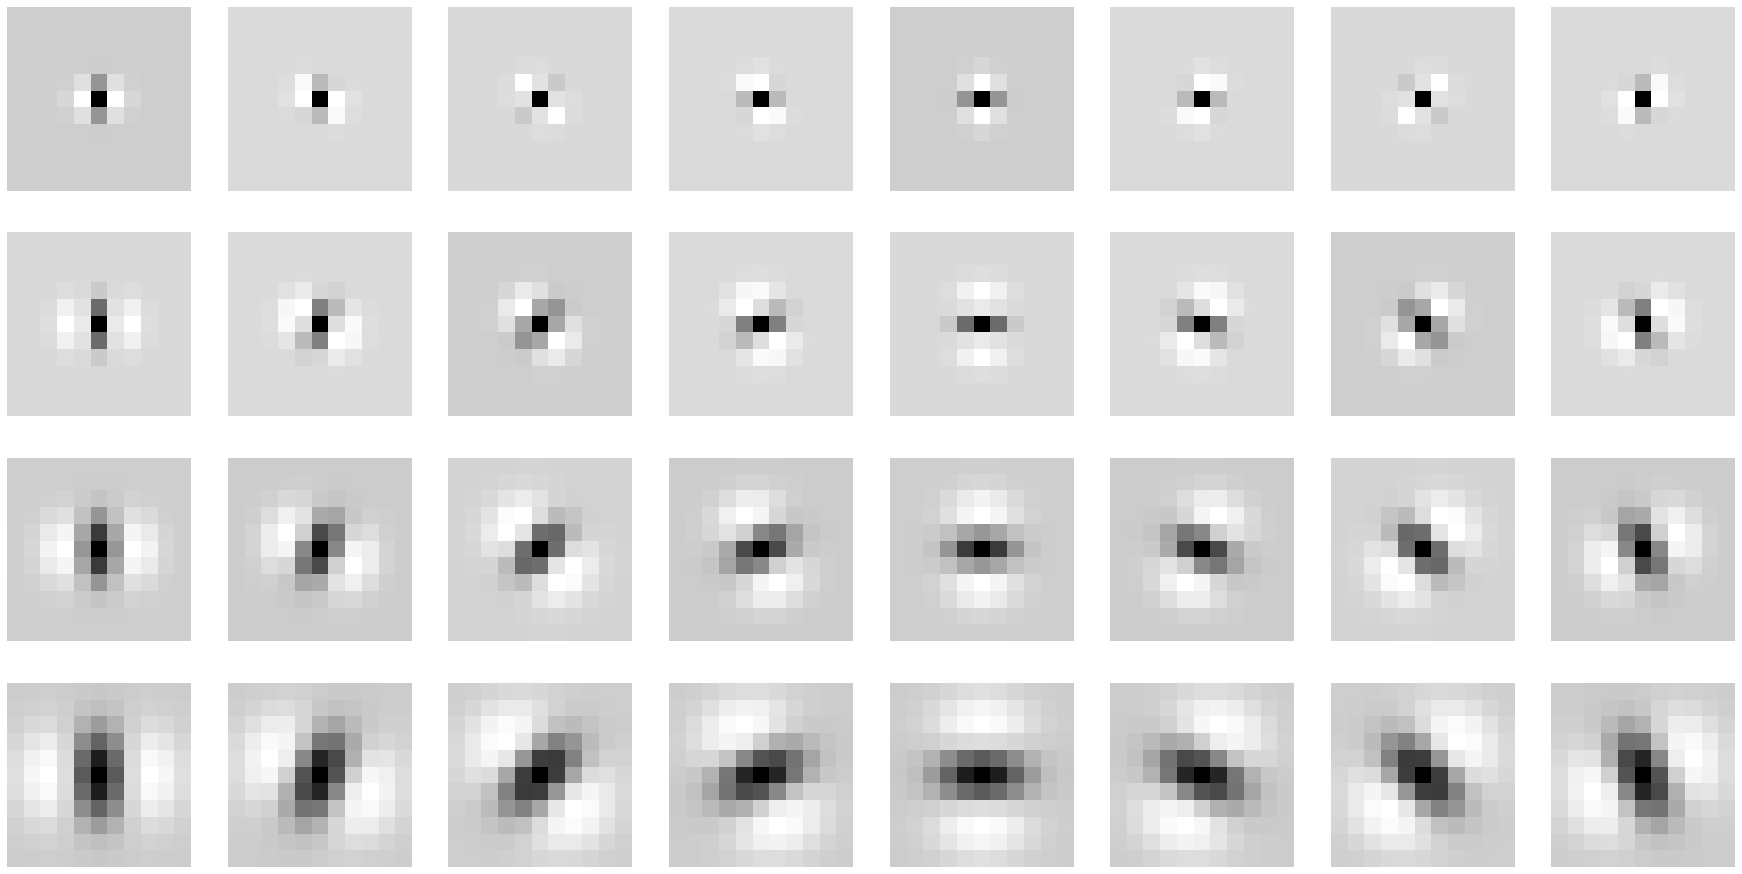

In [55]:
# Gabor filters
# sigma: 0.07 | filter_size: 64

fig, ax = plt.subplots(4,8,figsize=(24,12))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

sigma = 0.1
f = np.sqrt(2)
k_max = np.pi/2

x = y = np.linspace(-0.5,0.5,11)
xx, yy = np.meshgrid(x, y,sparse=True)

for nu in range(4):
    k_nu = k_max/(f**nu) 

    for mu in range(8):
        phi = np.pi*mu/8
        
        c1 = (k_nu/sigma)**2*np.exp(-(k_nu/sigma)**2*(xx**2+yy**2)/2)
        c2 = k_nu*(np.cos(phi)*xx+np.sin(phi)*yy)
        
        g1 = c1*(np.cos(c2)-np.exp(-sigma**2/2))
        g2 = c1*np.sin(c2)
                
        ax[nu,mu].imshow(g1,cmap='Greys')
        ax[nu,mu].set(xticks=[], yticks=[], frame_on=False)
        ax[nu,mu].axis('off')

plt.show()

In [23]:
def gabor_filtering(img,cmap='gray',sigma=0.07,filter_size=64):
    fig, ax = plt.subplots(4,7,figsize=(21,12))
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

    im_ = copy.deepcopy(img)
    im_ = (im_-im_.min())/(im_.max()-im_.min())
    im_ = (im_-1)/2

    f = np.sqrt(2)
    k_max = np.pi/2

    x = y = np.linspace(-0.5,0.5,filter_size)
    xx, yy = np.meshgrid(x, y,sparse=True)

    for nu in range(4):
        k_nu = k_max/(f**nu) 

        ax[nu,0].imshow(im_,cmap=cmap)
        ax[nu,0].set(xticks=[], yticks=[], frame_on=False)
        ax[nu,0].axis('off')

        for mu in range(5):
            phi = np.pi*mu/4

            c1 = (k_nu/sigma)**2*np.exp(-(k_nu/sigma)**2*(xx**2+yy**2)/2)
            c2 = k_nu*(np.cos(phi)*xx+np.sin(phi)*yy)

            g1 = c1*(np.cos(c2)-np.exp(-sigma**2/2))
            g2 = c1*np.sin(c2)

            conv1 = convolve(im_,g1,mode='reflect')
            conv2 = convolve(im_,g2,mode='reflect')

            A = np.sqrt(conv1**2+conv2**2)

            ax[nu,mu+1].imshow(A,cmap='Greys')
            ax[nu,mu+1].set(xticks=[], yticks=[], frame_on=False)
            ax[nu,mu+1].set_title('%.2f|%.1f'%(phi,np.rad2deg(phi)),fontsize=20)
            ax[nu,mu+1].axis('off')

        ax[nu,-1].imshow(im_,cmap=cmap)
        ax[nu,-1].set(xticks=[], yticks=[], frame_on=False)
        ax[nu,-1].axis('off')

    plt.show()

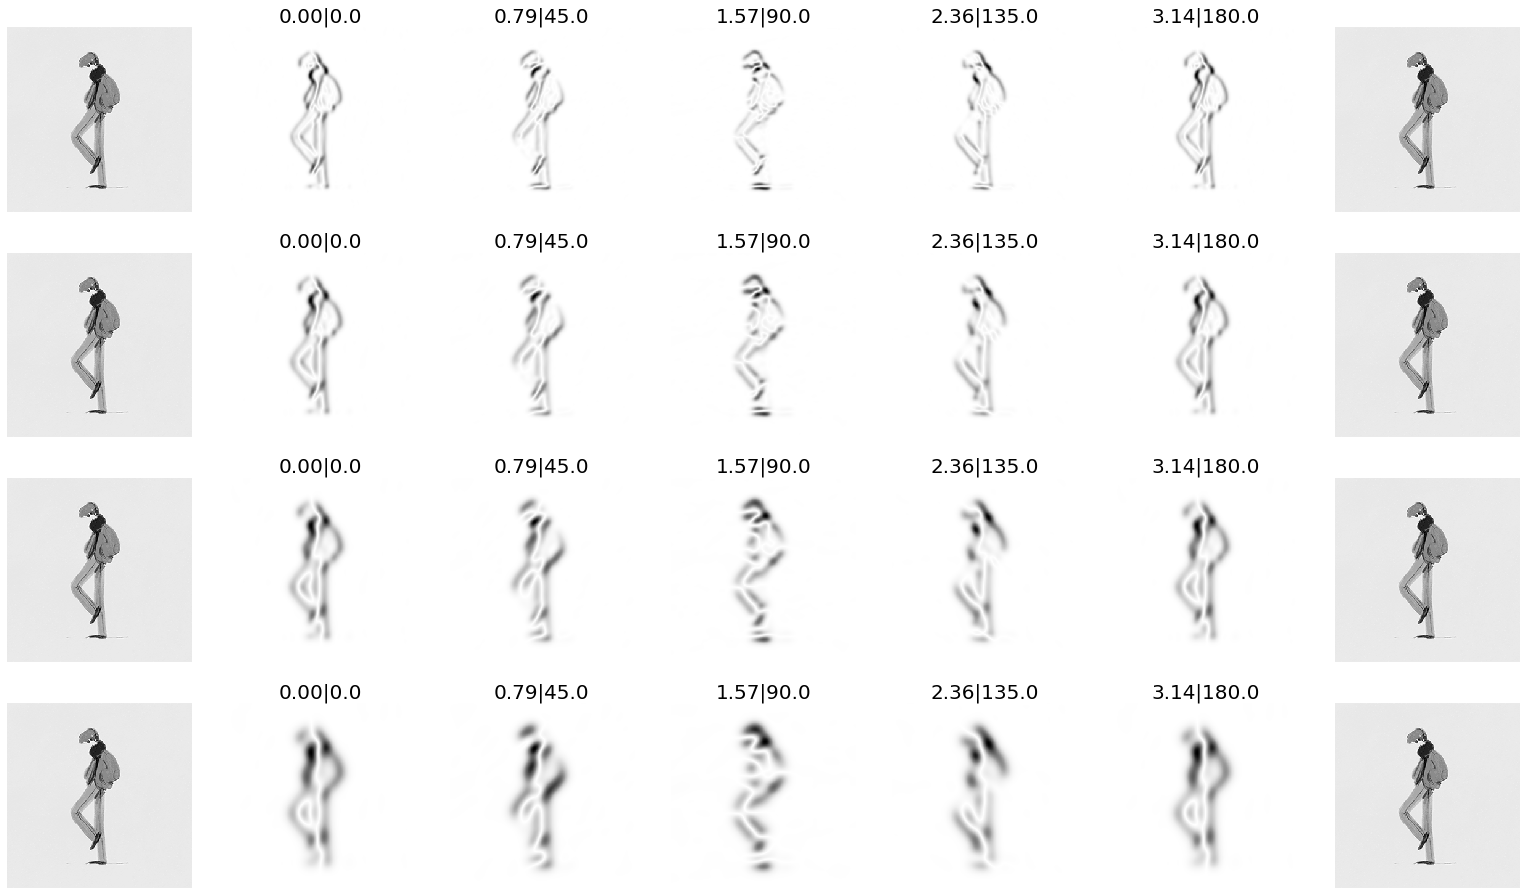

In [11]:
gabor_filtering(im_g)

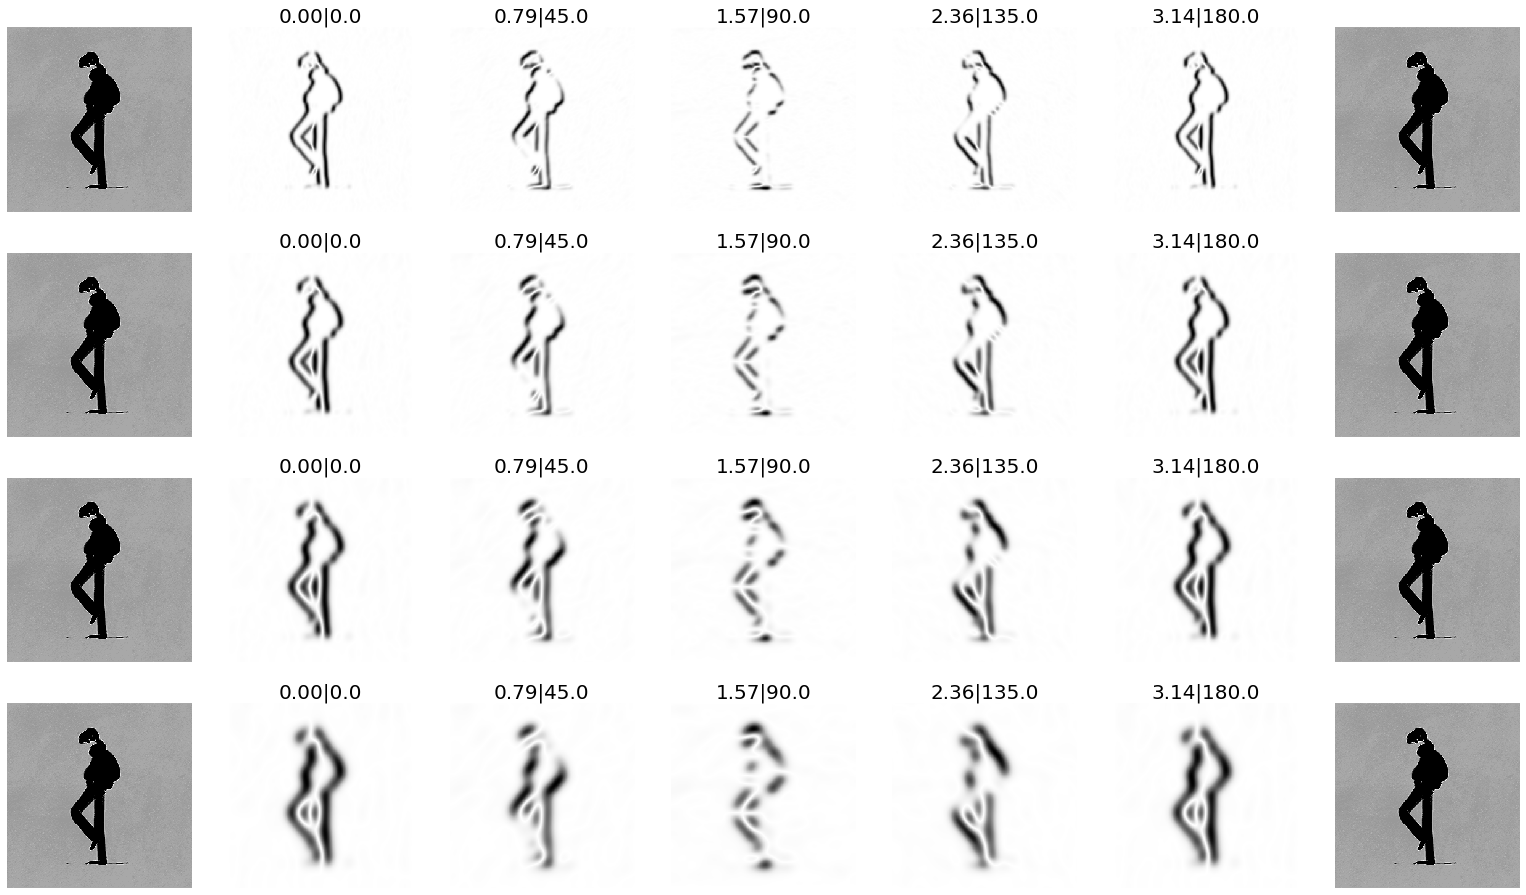

In [12]:
gabor_filtering(im_g_s)

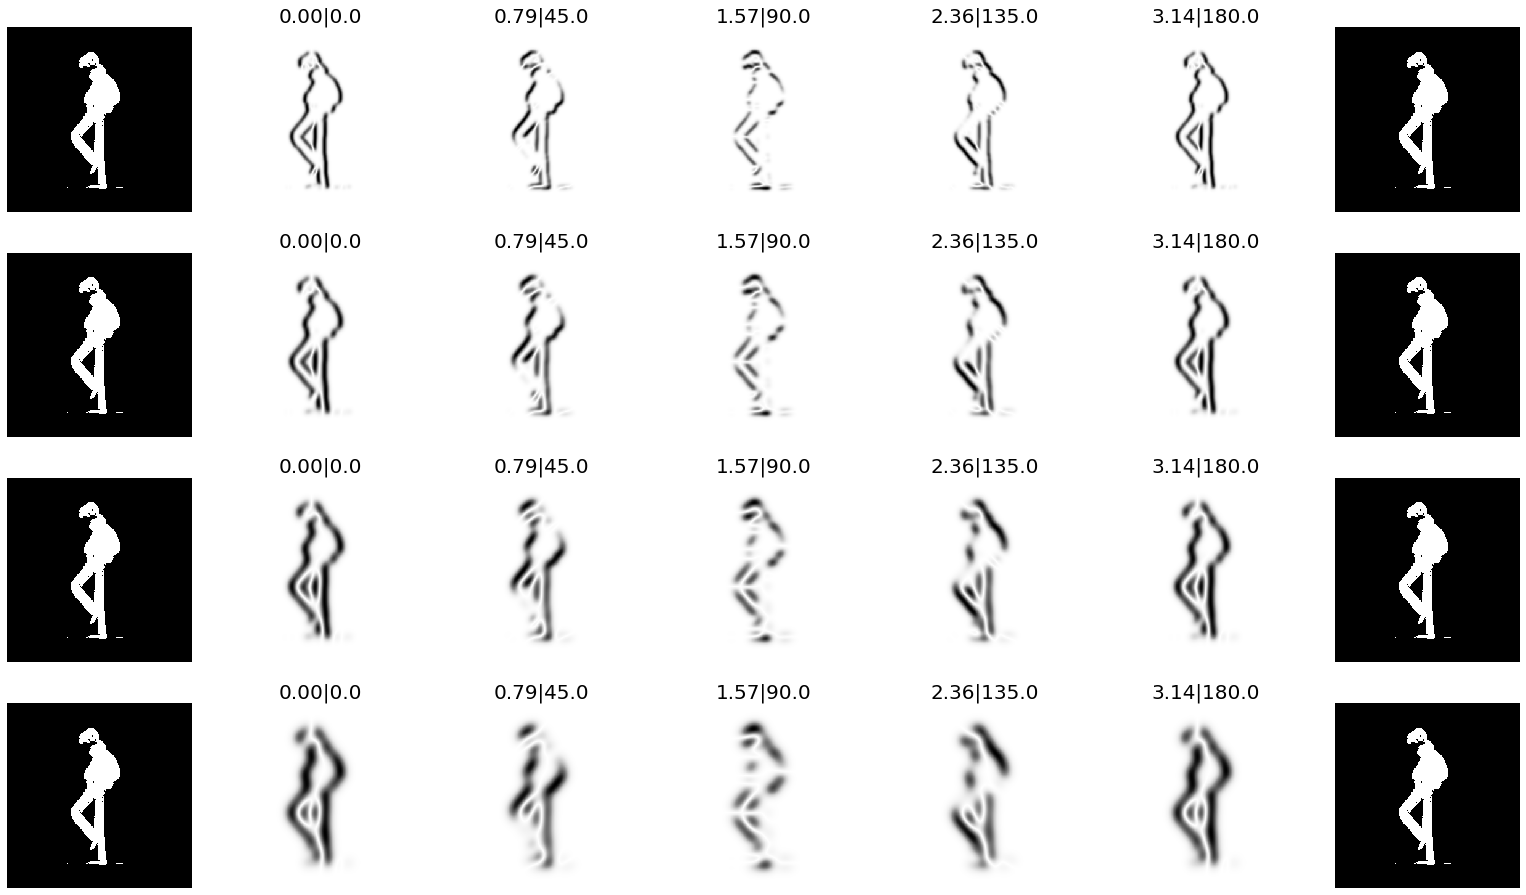

In [13]:
gabor_filtering(im_bw,cmap='binary')

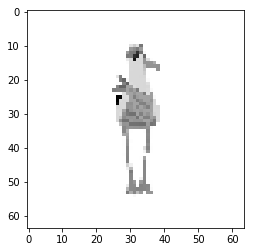

In [14]:
folder = './dataset/'
X = []

for i in range(36):
    tmp = cv2.imread(folder+str(i)+'.jpeg')
    tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2GRAY)
    tmp = cv2.resize(tmp,(64,64))
    X.append(tmp)
X = np.asarray(X)

plt.imshow(X[0],cmap='gray')
plt.show()

In [15]:
X_zca = np.reshape(X,(X.shape[0],X.shape[1]*X.shape[2]))
X_zca = X_zca/255.
X_zca = X_zca-X_zca.mean(axis=0)
print('In <- X',X_zca.shape)

cov = np.cov(X_zca, rowvar=False)
U,S,V = np.linalg.svd(cov)

e = 0.1 # whitening coefficient
W = U.dot(np.diag(1.0/np.sqrt(S + e))).dot(U.T)

X_zca = W.dot(X_zca.T).T
X_zca = (X_zca-X_zca.min())/(X_zca.max()-X_zca.min())
X_zca = np.reshape(X_zca,X.shape)
print('Out -> ZCA',X_zca.shape)

In <- X (36, 4096)
Out -> ZCA (36, 64, 64)


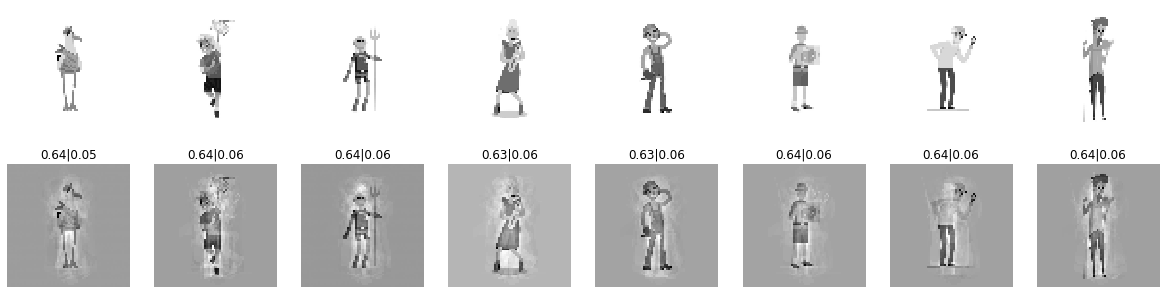

In [16]:
fig, ax = plt.subplots(2,8,figsize=(16,4))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

for i in range(8):
    ax[0,i].imshow(X[i],cmap='gray')
    ax[0,i].set(xticks=[], yticks=[], frame_on=False)
    ax[0,i].axis('off')
    
    ax[1,i].imshow(X_zca[i],cmap='gray')
    ax[1,i].set(xticks=[], yticks=[], frame_on=False)
    ax[1,i].set_title('%.2f|%.2f'%(X_zca[i].mean(),X_zca[i].std()))
    ax[1,i].axis('off')

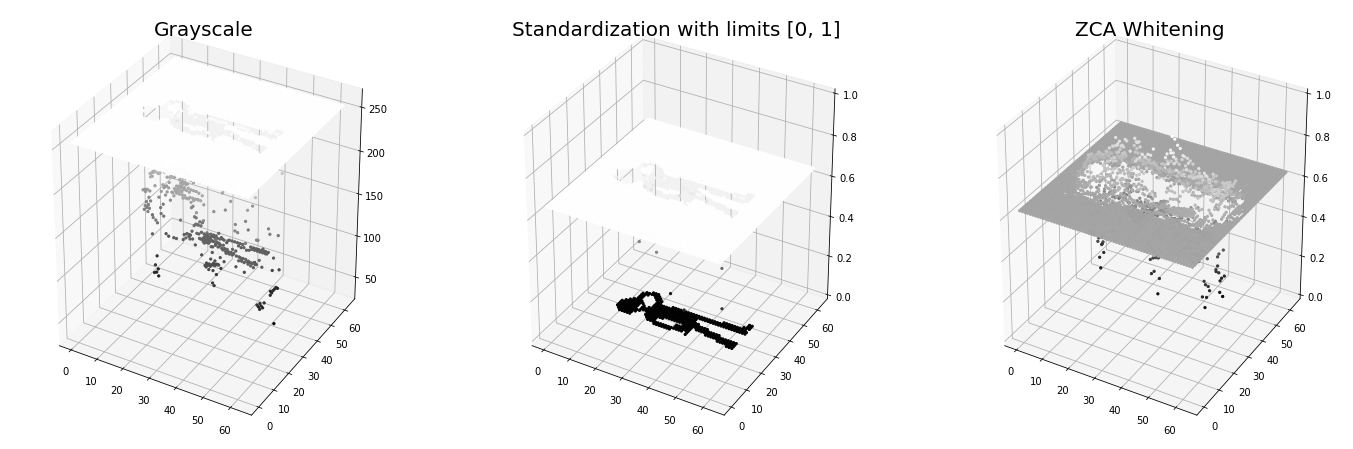

In [17]:
idx = 4
fig = plt.figure(figsize=(24,8))

# Standardization
X_s = (X[idx]-X[idx].mean())/X[idx].std()
X_s = np.clip(X_s, -1, 1)
X_s = (X_s+1)/2

ax1 = fig.add_subplot(131, projection='3d')
x,y,z = zip(*[(i,j,k) for i,row in enumerate(X[idx]) for j,k in enumerate(row)])
ax1.scatter(x,y,z,c=z,s=5, cmap='gray', depthshade=False)
ax1.set_title('Grayscale',fontsize=20)

ax2 = fig.add_subplot(132, projection='3d')
x,y,z = zip(*[(i,j,k) for i,row in enumerate(X_s) for j,k in enumerate(row)])
ax2.scatter(x,y,z,c=z,s=5, cmap='gray', depthshade=False)
ax2.set_zlim(0,1)
ax2.set_title('Standardization with limits [0, 1]',fontsize=20)

ax3 = fig.add_subplot(133, projection='3d')
x,y,z = zip(*[(i,j,k) for i,row in enumerate(X_zca[idx]) for j,k in enumerate(row)])
ax3.scatter(x,y,z,c=z,s=5, cmap='gray', depthshade=False)
ax3.set_zlim(0,1)
ax3.set_title('ZCA Whitening',fontsize=20)

plt.show()

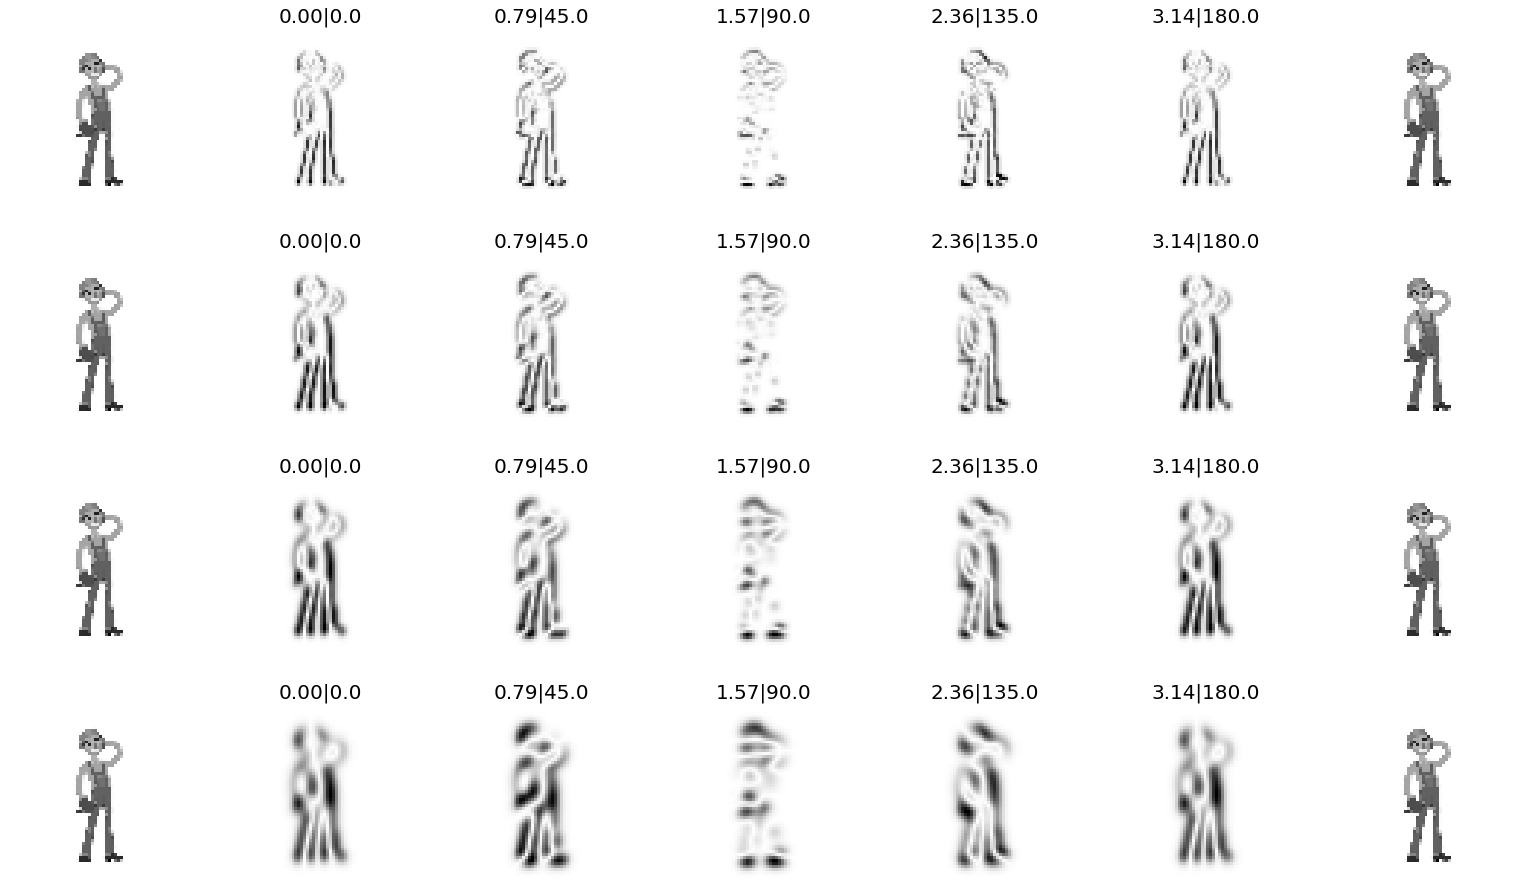

In [24]:
idx = 4
gabor_filtering(X[idx],filter_size=16)

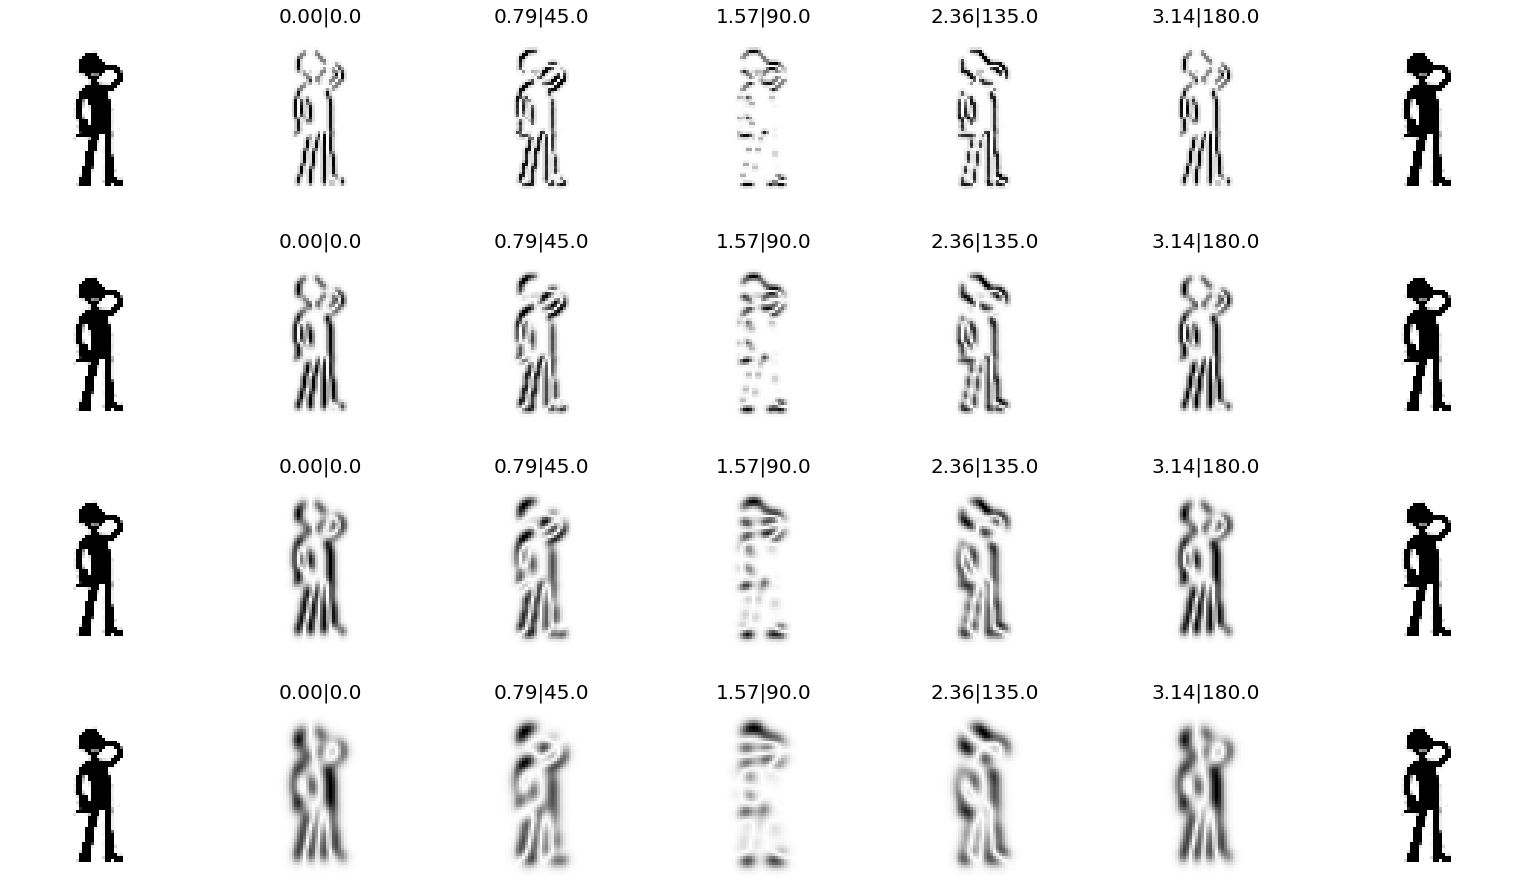

In [25]:
gabor_filtering(X_s,filter_size=16)

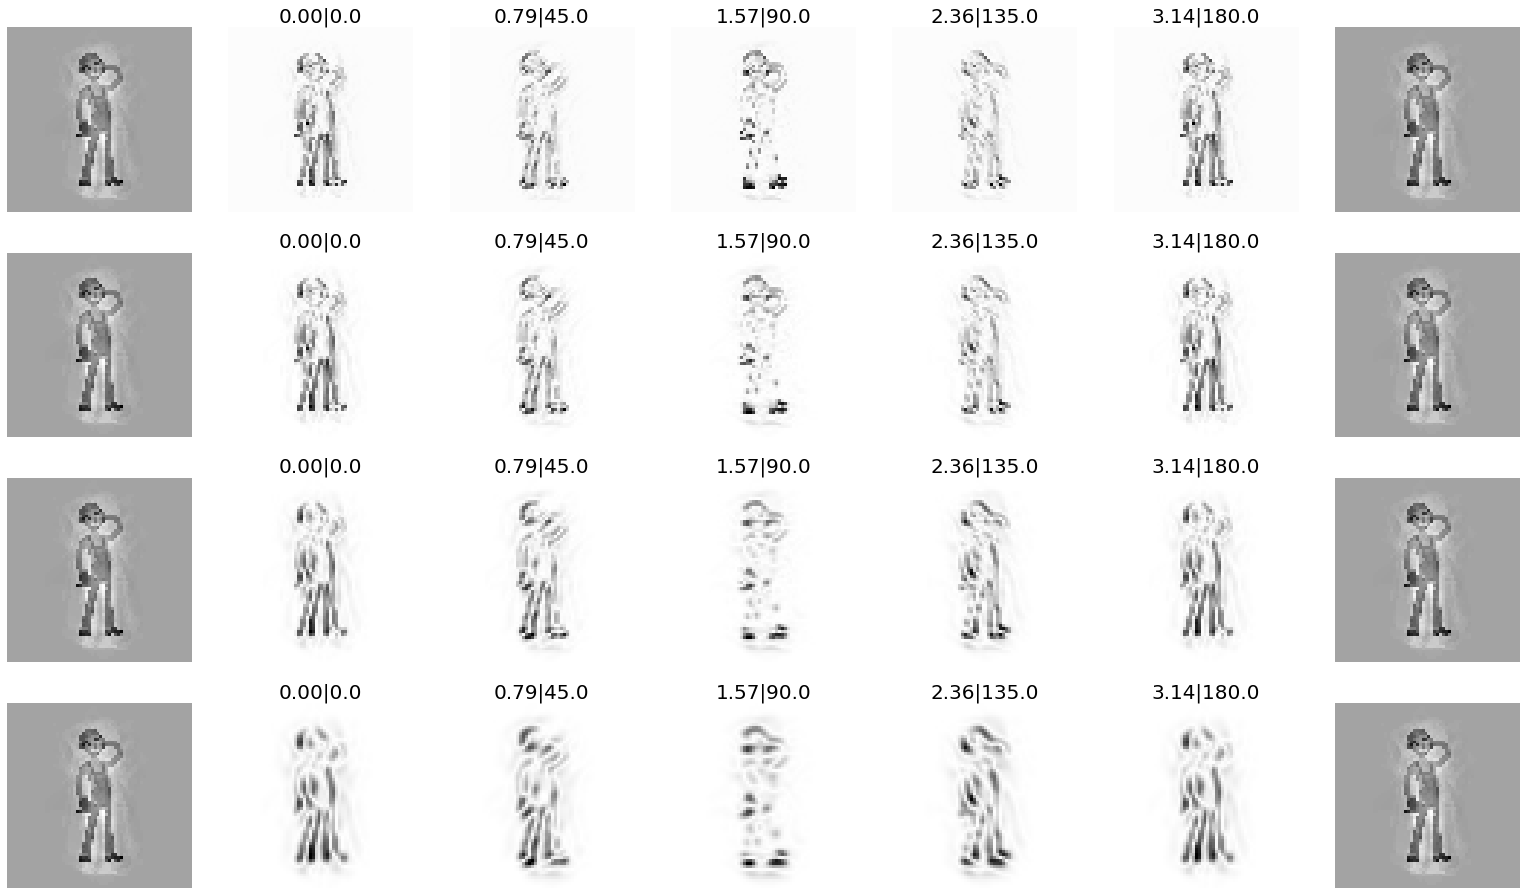

In [69]:
idx = 4
gabor_filtering(X_zca[idx],filter_size=11)

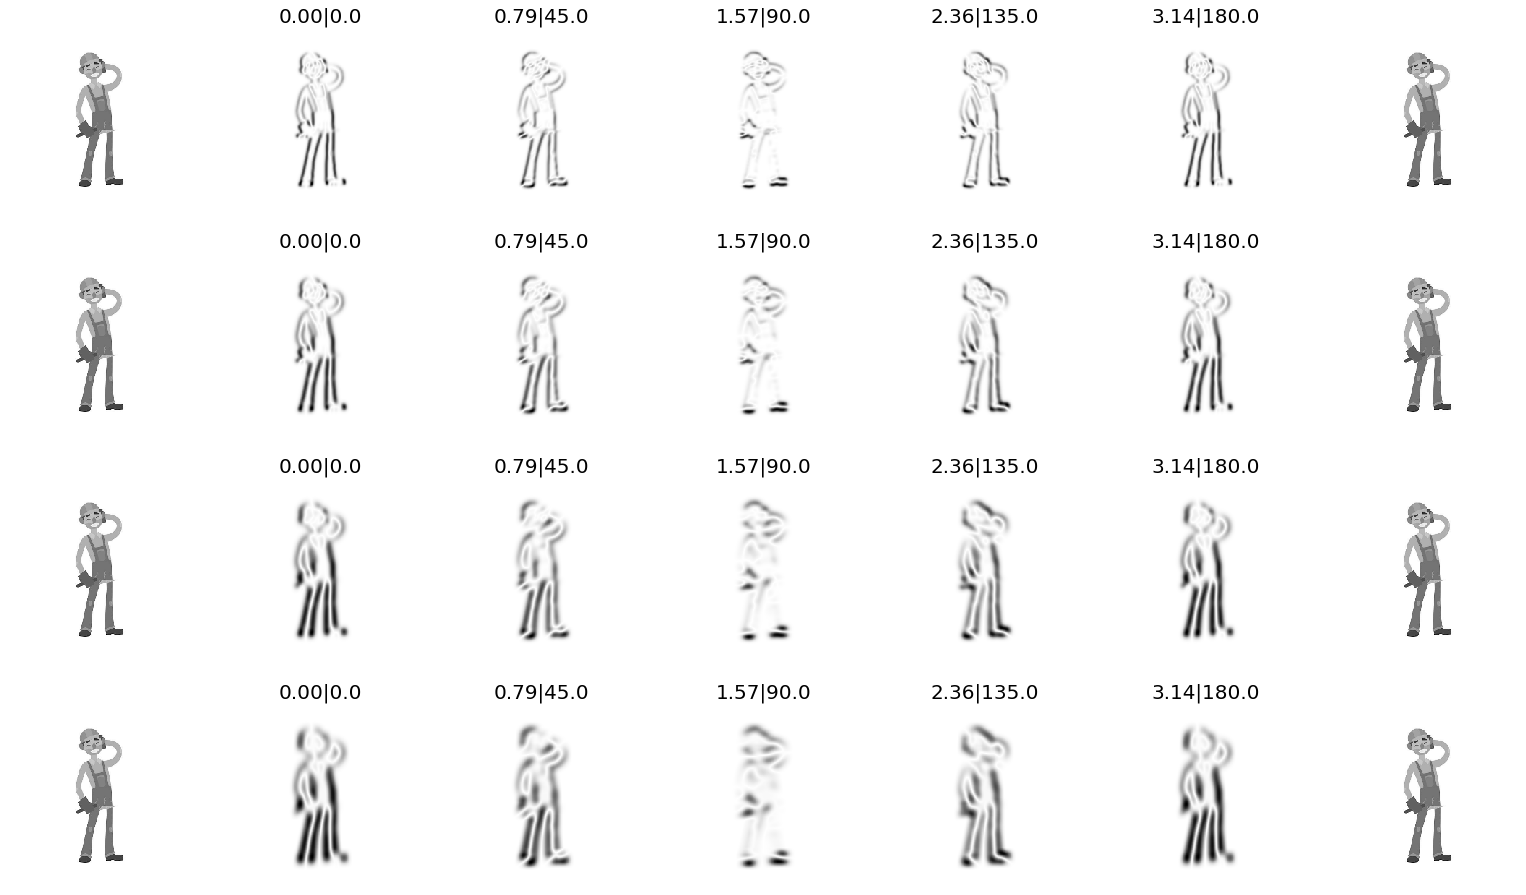

In [64]:
## folder = './dataset/'
idx = 4

tmp = cv2.imread(folder+str(idx)+'.jpeg')
tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2GRAY)
tmp = cv2.resize(tmp,(256,256))

gabor_filtering(tmp,sigma=0.15,filter_size=21)